In [73]:
import matplotlib.pyplot as plt
import os
import numpy as np
import json

In [94]:
model_root = os.path.realpath('../../model_contradictions/')
graphics_root = os.path.join(model_root, 'graphics')

log_finn_root = f'/disk/vanishing_data/ju878/log_finn/'
eval_root = os.path.join(log_finn_root, 'groundtruth_eval')
eval_all_root = os.path.join(log_finn_root, 'groundtruth_eval_all')
eval_all_anno_root = os.path.join(log_finn_root, 'groundtruth_eval_all_annotation')
eval_counts_file = os.path.join(eval_root, 'counts.txt')
eval_all_counts_file = os.path.join(eval_all_root, 'counts.txt')
eval_all_anno_counts_file = os.path.join(eval_all_anno_root, 'counts.txt')

print_for_latex = False
plt_show = True

In [75]:
#     0      1     2    3     4    5    6    7     8    9   10  11  12  13  14  15  16  17    18         19           20
#    c_11, c_12, c_13, c_14, c11, c12, c13, c14, c_10, c10, c1, c2, c3, c4, tp, fp, fn, tn, total, original_total, new_label_total

eval_all_counts = np.loadtxt(eval_all_counts_file, delimiter=',')
eval_all_anno_counts = np.loadtxt(eval_all_anno_counts_file, delimiter=',')

eval_once_counts = eval_all_counts[:1034]
eval_kitti_counts = eval_all_counts[1034:1341]
eval_nuscenes_counts = eval_all_counts[1341:]

eval_once_anno_counts = eval_all_anno_counts[:4413]
eval_kitti_anno_counts = eval_all_anno_counts[4413:4812]
eval_nuscenes_anno_counts = eval_all_anno_counts[4812:]

eval_all_anno_counts_cut = eval_all_anno_counts[np.sum(eval_all_anno_counts, axis=1) != 0]
eval_once_anno_counts_cut = eval_once_anno_counts[np.sum(eval_once_anno_counts, axis=1) != 0]
eval_kitti_anno_counts_cut = eval_kitti_anno_counts[np.sum(eval_kitti_anno_counts, axis=1) != 0]
eval_nuscenes_anno_counts_cut = eval_nuscenes_anno_counts[np.sum(eval_nuscenes_anno_counts, axis=1) != 0]

eval_all = [eval_all_counts, eval_once_counts, eval_kitti_counts, eval_nuscenes_counts, 
            eval_all_anno_counts_cut, eval_once_anno_counts_cut, eval_kitti_anno_counts_cut, eval_nuscenes_anno_counts_cut]

with open('/disk/ml/own_datasets/CODA/corner_case.json', 'r') as f:
    data_cornercases = json.load(f)
    
categories = data_cornercases['categories']
images = data_cornercases['images']
annotations = data_cornercases['annotations']

annotations_cut = []
for annotation in annotations:
    if not np.sum(eval_all_anno_counts[annotation['id'] - 1], axis=0) == 0:
        annotations_cut.append(annotation)
        


sum_all_counts = np.sum(eval_all_counts, axis=0)
sum_once_counts = np.sum(eval_once_counts, axis=0)
sum_kitti_counts = np.sum(eval_kitti_counts, axis=0)
sum_nuscenes_counts = np.sum(eval_nuscenes_counts, axis=0)

sum_all = [sum_all_counts, sum_once_counts, sum_kitti_counts, sum_nuscenes_counts]

dataset_names = ['CODA', 'CODA-ONCE', 'CODA-KITTI', 'CODA-nuScenes', 'CODA-Anno', 'CODA-ONCE-Anno', 'CODA-KITTI-Anno', 'CODA-nuScenes-Anno']
categorie_names = ['sc_pedestrian', 'sc_cyclist', 'sc_vehicle', 'sc_animal', 'sc_traffic_facility', 'sc_obstruction', 'sc_misc', 
                   'c_pedestrian', 'c_cyclist', 'c_car', 'c_truck', 'c_tram', 'c_tricycle', 'c_bus', 'c_bicycle', 'c_moped', 'c_motorcycle',
                   'c_stroller', 'c_wheelchair', 'c_cart', 'c_trailer', 'c_construction_vehicle', 'c_recreational_vehicle', 'c_dog', 'c_barrier', 
                   'c_bollard', 'c_warning_sign', 'c_sentry_box', 'c_traffic_box', 'c_traffic_cone', 'c_traffic_island', 'c_traffic_light', 
                   'c_traffic_sign', 'c_debris', 'c_suitcace', 'c_dustbin', 'c_concrete_block', 'c_machinery', 'c_chair', 'c_phone_booth', 'c_basket',
                   'c_misc']
cm_names = ['All', 'Boxes', 'Overlap']
cm_anno_names = ['Boxes', 'Overlap']

labels = ['tp', 'fp', 'fn', 'tn']
title = ['All', 'Boxes', 'Overlap', 'Boxes_anno', 'Overlap_anno']


In [76]:
supercategories = ['pedestrian', 'cyclist', 'vehicle', 'animal', 'traffic_facility', 'obstruction', 'misc']
sc_pedestrian = []
sc_cyclist = []
sc_vehicle = []
sc_animal = []
sc_traffic_facility = []
sc_obstruction = []
sc_misc = []
c_pedestrian = []
c_cyclist = []
c_car = []
c_truck = []
c_tram = [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
c_tricycle = []
c_bus = []
c_bicycle = []
c_moped = []
c_motorcycle = []
c_stroller = []
c_wheelchair = []
c_cart = []
c_trailer = []
c_construction_vehicle = []
c_recreational_vehicle = []
c_dog = []
c_barrier = []
c_bollard = []
c_warning_sign = []
c_sentry_box = []
c_traffic_box = []
c_traffic_cone = []
c_traffic_island = []
c_traffic_light = []
c_traffic_sign = []
c_debris = []
c_suitcace = []
c_dustbin = []
c_concrete_block = []
c_machinery = []
c_chair = []
c_phone_booth = []
c_basket = []
c_misc = []

for index_anno, annotation in enumerate(annotations_cut):
    for categorie in categories:
        if annotation['category_id'] == categorie['id']:
            categorie_name = categorie['name']
            if f'c_{categorie_name}' in globals() and isinstance(globals()[f'c_{categorie_name}'], list):
                    globals()[f'c_{categorie_name}'].append(eval_all_anno_counts_cut[index_anno])
            for index_sc, sc in enumerate(supercategories):
                if categorie['supercategory'] == sc:
                    if f'sc_{sc}' in globals() and isinstance(globals()[f'sc_{sc}'], list):
                        globals()[f'sc_{sc}'].append(eval_all_anno_counts_cut[index_anno])

eval_anomalies = [sc_pedestrian, sc_cyclist, sc_vehicle, sc_animal, sc_traffic_facility, sc_obstruction, sc_misc,
                  c_pedestrian, c_cyclist, c_car, c_truck, c_tram, c_tricycle, c_bus, c_bicycle, c_moped, c_motorcycle,
                  c_stroller, c_wheelchair, c_cart, c_trailer, c_construction_vehicle, c_recreational_vehicle, c_dog, c_barrier, 
                  c_bollard, c_warning_sign, c_sentry_box, c_traffic_box, c_traffic_cone, c_traffic_island, c_traffic_light, 
                  c_traffic_sign, c_debris, c_suitcace, c_dustbin, c_concrete_block, c_machinery, c_chair, c_phone_booth, c_basket,
                  c_misc
                  ] 
#print(c_car)

In [77]:
def plotgraph(counts, dataset, part):
    # Create a pie plot
    fig = plt.figure(figsize=(6, 4), tight_layout=False)
    fig.suptitle(f'{dataset} - {part}')
    ax = fig.add_subplot(121)
    ax.pie(counts[0], labels=labels, autopct='%1.1f%%')
    ax.set_title(f'{title[1]}')
    
    ax = fig.add_subplot(122)
    ax.pie(counts[1], labels=labels, autopct='%1.1f%%')
    ax.set_title(f'{title[2]}')
    
    fig.savefig(os.path.join(graphics_root, f'evaluate_detection_method/{dataset}_{part}.svg'), format='svg', dpi=1200)
    # Display the plot
    if plt_show:
        plt.show()
    plt.close()

def plotgraph_dataset(counts, counts_anno, dataset, part):
    
    # Create a pie plot
    fig = plt.figure(figsize=(14, 4), tight_layout=False)
    fig.suptitle(f'{dataset} - {part}')
    ax = fig.add_subplot(151)
    ax.pie(counts[0], labels=labels, autopct='%1.1f%%')
    ax.set_title(f'{title[0]}')
    
    ax = fig.add_subplot(152)
    ax.pie(counts[1], labels=labels, autopct='%1.1f%%')
    ax.set_title(f'{title[1]}')
    
    ax = fig.add_subplot(153)
    ax.pie(counts[2], labels=labels, autopct='%1.1f%%')
    ax.set_title(f'{title[2]}')
    
    ax = fig.add_subplot(154)
    ax.pie(counts_anno[0], labels=labels, autopct='%1.1f%%')
    ax.set_title(f'{title[3]}')
    
    ax = fig.add_subplot(155)
    ax.pie(counts_anno[1], labels=labels, autopct='%1.1f%%')
    ax.set_title(f'{title[4]}')

    fig.savefig(os.path.join(graphics_root, f'evaluate_detection_method/{dataset}_{part}.svg'), format='svg', dpi=1200)
    # Display the plot
    if plt_show:
        plt.show()
    plt.close()

In [78]:
def create_iou_without_cm(eval_counts):
    iou = []
    for eval in eval_counts:
        if (eval[2] + eval[3] + eval[4] + eval[5] + eval[6] + eval[7] + eval[12] + eval[13]) == 0:
            iou.append(0)
            continue
        iou.append((eval[6] + eval[7]) / (eval[2] + eval[3] + eval[4] + eval[5] + eval[6] + eval[7] + eval[12] + eval[13]))
    return iou

def create_mean_iou(cms):
    iou = []
    for i in range(len(cms[0])):
        if (cms[0][i] + cms[1][i] + cms[2][i]) == 0:
            iou.append(0)
            continue
        iou.append((cms[0][i]) / (cms[0][i] + cms[1][i] + cms[2][i]))
    return iou

def create_iou(cm):
    if not (cm[0] + cm[1] + cm[2]) == 0:
        iou = cm[0] / (cm[0] + cm[1] + cm[2])
    else:
        iou = 0    
    return iou

In [79]:
def create_mean_cm(eval):
    cm_all = [[],[],[],[]]
    cm_boxes = [[],[],[],[]]
    cm_overlap = [[],[],[],[]]
    for e in eval:
        if not (e[18]) == 0:
            cm_all[0].append(e[14] / e[18])
            cm_all[1].append(e[15] / e[18])
            cm_all[2].append(e[16] / e[18])
            cm_all[3].append(e[17] / e[18])

        if not (e[19]) == 0:
            cm_boxes[0].append((e[6] + e[7]) / e[19])
            cm_boxes[1].append((e[2] + e[3]) / e[19])
            cm_boxes[2].append((e[4] + e[5] + e[9]) / e[19])
            cm_boxes[3].append((e[0] + e[1] + e[8]) / e[19])

        if not (e[0] + e[1] + e[2] + e[3] + e[4] + e[5] + e[6] + e[7]) == 0:
            cm_overlap[0].append((e[6] + e[7]) / (e[0] + e[1] + e[2] + e[3] + e[4] + e[5] + e[6] + e[7]))
            cm_overlap[1].append((e[2] + e[3]) / (e[0] + e[1] + e[2] + e[3] + e[4] + e[5] + e[6] + e[7]))
            cm_overlap[2].append((e[4] + e[5]) / (e[0] + e[1] + e[2] + e[3] + e[4] + e[5] + e[6] + e[7]))
            cm_overlap[3].append((e[0] + e[1]) / (e[0] + e[1] + e[2] + e[3] + e[4] + e[5] + e[6] + e[7]))
    
    return cm_all, cm_boxes, cm_overlap

def create_cm(eval):
    e = np.sum(eval, axis=0)
    cm_all = [e[14], e[15], e[16], e[17]]
    cm_boxes = [e[6] + e[7], e[2] + e[3], e[4] + e[5] + e[9], e[0] + e[1] + e[8]]
    cm_overlap = [e[6] + e[7], e[2] + e[3], e[4] + e[5], e[0] + e[1]]
    
        
    if not (e[18]) == 0:
        cm_all = cm_all / e[18]
    if not (e[19]) == 0:
        cm_boxes = cm_boxes / e[19]
    if not (e[0] + e[1] + e[2] + e[3] + e[4] + e[5] + e[6] + e[7]) == 0:
        cm_overlap = cm_overlap / (e[0] + e[1] + e[2] + e[3] + e[4] + e[5] + e[6] + e[7])
    
    return cm_all, cm_boxes, cm_overlap

In [80]:
def get_mean(index, e):
    mean_count = []
    mean_iou = []
    mean_ap = []
    mean_ar = []
    mean_f1 = []
    mean_cm = []
    confusion_matrices = create_mean_cm(e)
    for i, cms in enumerate(confusion_matrices):
        
        if index >= 4 and i == 0:
            continue
        
        m_iou = create_mean_iou(cms)
        if not len(m_iou) == 0:
            iou = sum(m_iou) / len(m_iou)
        else:
            iou = 0
        
        precision = 0
        counter_precision = 0
        recall = 0
        counter_recall = 0
        for cm in range(len(cms[0])):
            counter_precision += 1
            counter_recall += 1
            if (cms[0][cm] + cms[1][cm]) == 0:
                continue
            precision += (cms[0][cm]) / (cms[0][cm] + cms[1][cm])
            if (cms[0][cm] + cms[2][cm]) == 0:
                continue
            recall += (cms[0][cm]) / (cms[0][cm] + cms[2][cm])
            
        if not counter_precision == 0:
            precision = (precision / counter_precision)
        if not counter_recall == 0:
            recall = (recall / counter_recall)
        if not (precision + recall) == 0:
            f1 = (2 * (precision * recall)) / (precision + recall)
        else:
            f1 = 0
        mean_count.append(counter_precision)
        mean_iou.append(iou)  
        mean_ap.append(precision)
        mean_ar.append(recall)
        mean_f1.append(f1)
        conf_mat = [0, 0, 0, 0]
        for cm in range(len(cms[0])):
            conf_mat[0] += cms[0][cm]
            conf_mat[1] += cms[1][cm]
            conf_mat[2] += cms[2][cm]
            conf_mat[3] += cms[3][cm]
        for c in range(len(conf_mat)):
            if not len(cms[0]) == 0:
                conf_mat[c] = conf_mat[c] / len(cms[0])
        mean_cm.append(conf_mat)
    
    return mean_iou, mean_ap, mean_ar, mean_f1, mean_cm, mean_count

In [81]:
def get_average(index, e):
    average_iou = []
    average_ap = []
    average_ar = []
    average_f1 = []
    confusion_matrices = create_cm(e)
    for i, cms in enumerate(confusion_matrices):
        
        if index >= 4 and i == 0:
            continue
        
        iou = create_iou(cms)
        if not (cms[0] + cms[1]) == 0:
            precision = (cms[0]) / (cms[0] + cms[1])
        else:
            precision = 0
        if not (cms[0] + cms[2]) == 0:
            recall = (cms[0]) / (cms[0] + cms[2])
        else:
            recall = 0
        
        if not (precision + recall) == 0:
            f1 = (2 * (precision * recall)) / (precision + recall)
        else:
            f1 = 0
             
        average_iou.append(iou)  
        average_ap.append(precision)
        average_ar.append(recall) 
        average_f1.append(f1)
    
    if index >= 4:
        confusion_matrices = confusion_matrices[1:]
    return average_iou, average_ap, average_ar, average_f1, confusion_matrices

In [91]:
def get_IoU_AP_AR_F1_datasets(eval_all):
    all_mean = []
    all_average = []
    for index, e in enumerate(eval_all):
        mean = get_mean(index, e)
        average = get_average(index, e)
        
        for i in range(len(mean[4])):
            print(f'{dataset_names[index]}: {cm_names[i]}')
            if print_for_latex:
                print('& ' + dataset_names[index] + ' & ' +
                      str(mean[5][i]) + ' & ' +
                      str(round(mean[0][i] * 100, 1)) + ' & ' + 
                      str(round(mean[1][i] * 100, 1)) + ' & ' + 
                      str(round(mean[2][i] * 100, 1)) + ' & ' + 
                      str(round(mean[3][i] * 100, 1)) + ' & ' + 
                      str(round(average[0][i] * 100, 1)) + ' & ' + 
                      str(round(average[1][i] * 100, 1)) + ' & ' + 
                      str(round(average[2][i] * 100, 1)) + ' & ' + 
                      str(round(average[3][i] * 100, 1)) + ' \\\\'
                      )
            else:
                print(f'Count: ' + str(mean[5][i]))
                print('mean IoU: ' + str(round(mean[0][i] * 100, 1)))
                print('mean AP: ' + str(round(mean[1][i] * 100, 1)))
                print('mean AR: ' + str(round(mean[2][i] * 100, 1)))
                print('mean F1: ' + str(round(mean[3][i] * 100, 1)))
                
                print('IoU: ' + str(round(average[0][i] * 100, 1)))
                print('AP: ' + str(round(average[1][i] * 100, 1)))
                print('AR: ' + str(round(average[2][i] * 100, 1)))
                print('F1: ' + str(round(average[3][i] * 100, 1)) + '\n')
        
        all_mean.append(mean[4])
        all_average.append(average[4])
        
    for index in range(4):
        plotgraph_dataset(all_mean[index], all_mean[index + 4], dataset_names[index], 'Individual')
        plotgraph_dataset(all_average[index], all_average[index + 4], dataset_names[index], 'Aggregated')
             

In [83]:
def get_IoU_AP_AR_F1_anomalies(eval_all):
    
    for index, e in enumerate(eval_all):
        mean = get_mean(4, e)
        average = get_average(4, e)
        
        for i in range(len(mean[4])):
            print(f'{categorie_names[index]}: {cm_anno_names[i]}')
            if print_for_latex:
                print('& ' + categorie_names[index].split('_')[1] + ' & ' +
                      str(mean[5][i]) + ' & ' +
                      str(round(mean[0][i] * 100, 1)) + ' & ' + 
                      str(round(mean[1][i] * 100, 1)) + ' & ' + 
                      str(round(mean[2][i] * 100, 1)) + ' & ' + 
                      str(round(mean[3][i] * 100, 1)) + ' & ' + 
                      str(round(average[0][i] * 100, 1)) + ' & ' + 
                      str(round(average[1][i] * 100, 1)) + ' & ' + 
                      str(round(average[2][i] * 100, 1)) + ' & ' + 
                      str(round(average[3][i] * 100, 1)) + ' \\\\'
                      )
            else:
                print(f'Count: ' + str(mean[5][i]))
                print('mean IoU: ' + str(round(mean[0][i] * 100, 1)))
                print('mean AP: ' + str(round(mean[1][i] * 100, 1)))
                print('mean AR: ' + str(round(mean[2][i] * 100, 1)))
                print('mean F1: ' + str(round(mean[3][i] * 100, 1)))
                
                print('IoU: ' + str(round(average[0][i] * 100, 1)))
                print('AP: ' + str(round(average[1][i] * 100, 1)))
                print('AR: ' + str(round(average[2][i] * 100, 1)))
                print('F1: ' + str(round(average[3][i] * 100, 1)) + '\n')
        
        plotgraph(mean[4], categorie_names[index], 'Individual')
        plotgraph(average[4], categorie_names[index], 'Aggregated')

CODA: All
Count: 1412
mean IoU: 8.9
mean AP: 13.2
mean AR: 26.2
mean F1: 17.5
IoU: 10.8
AP: 13.7
AR: 33.5
F1: 19.5

CODA: Boxes
Count: 1412
mean IoU: 23.1
mean AP: 50.8
mean AR: 26.2
mean F1: 34.6
IoU: 31.2
AP: 81.4
AR: 33.5
F1: 47.5

CODA: Overlap
Count: 1304
mean IoU: 32.4
mean AP: 55.0
mean AR: 37.9
mean F1: 44.9
IoU: 40.5
AP: 81.4
AR: 44.6
F1: 57.6

CODA-ONCE: All
Count: 1034
mean IoU: 8.9
mean AP: 14.0
mean AR: 27.1
mean F1: 18.4
IoU: 8.8
AP: 11.1
AR: 29.4
F1: 16.1

CODA-ONCE: Boxes
Count: 1034
mean IoU: 24.4
mean AP: 57.6
mean AR: 27.1
mean F1: 36.9
IoU: 27.2
AP: 78.2
AR: 29.4
F1: 42.7

CODA-ONCE: Overlap
Count: 985
mean IoU: 33.9
mean AP: 60.5
mean AR: 38.8
mean F1: 47.2
IoU: 36.6
AP: 78.2
AR: 40.7
F1: 53.6

CODA-KITTI: All
Count: 307
mean IoU: 10.9
mean AP: 13.3
mean AR: 29.0
mean F1: 18.3
IoU: 14.9
AP: 19.0
AR: 40.9
F1: 25.9

CODA-KITTI: Boxes
Count: 307
mean IoU: 24.0
mean AP: 37.8
mean AR: 29.0
mean F1: 32.8
IoU: 38.2
AP: 85.3
AR: 40.9
F1: 55.3

CODA-KITTI: Overlap
Count: 25

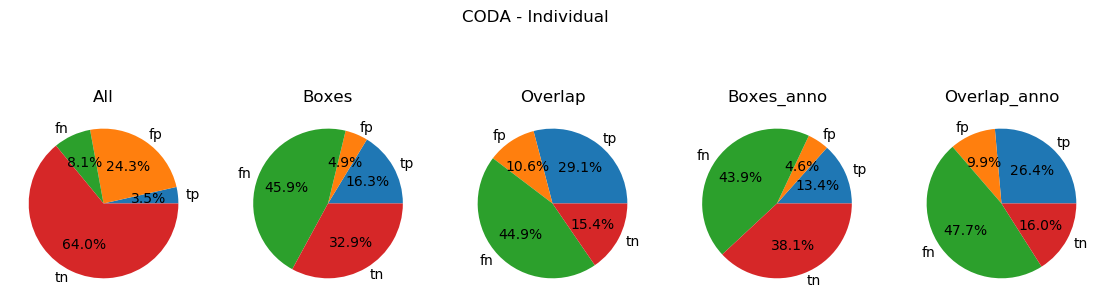

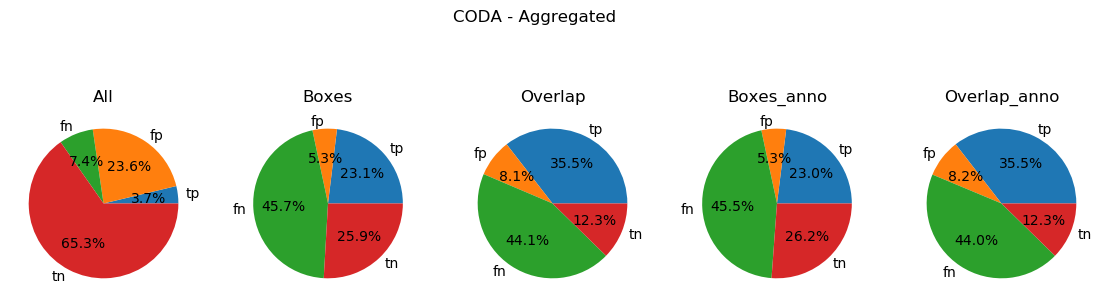

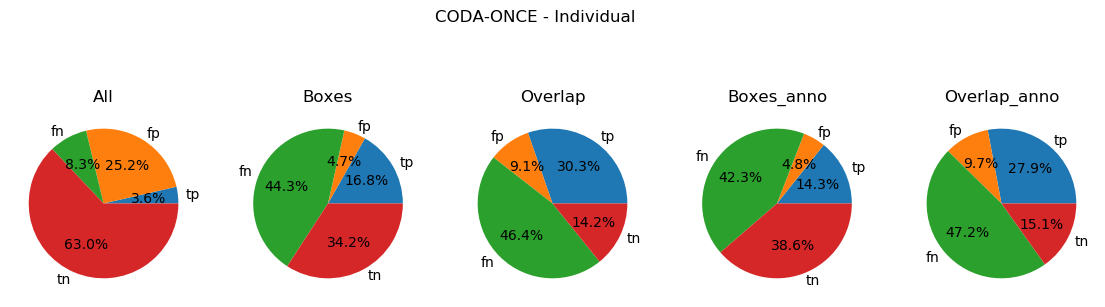

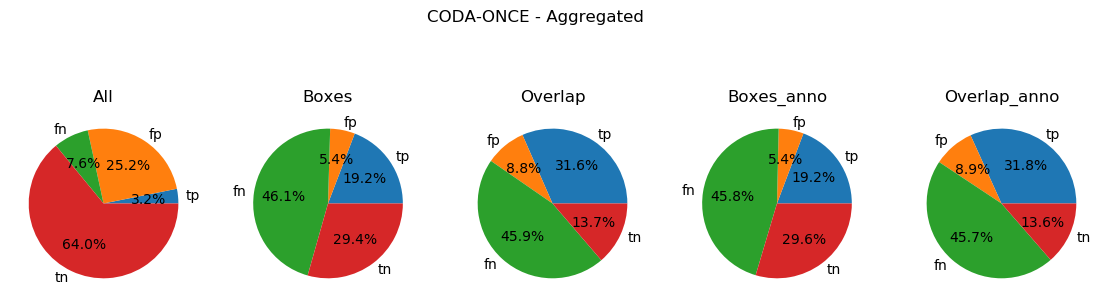

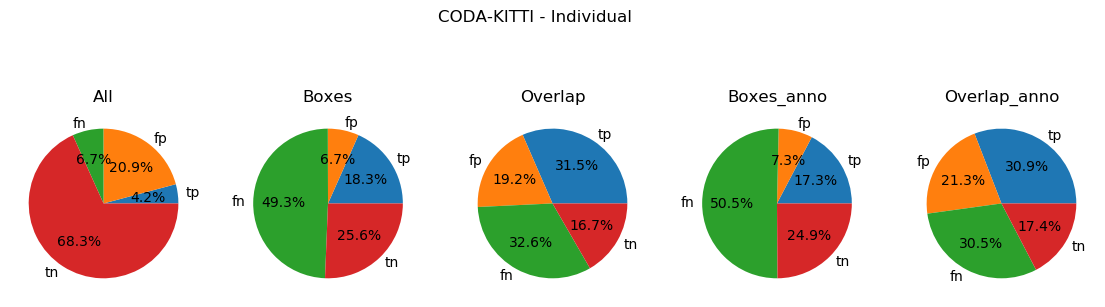

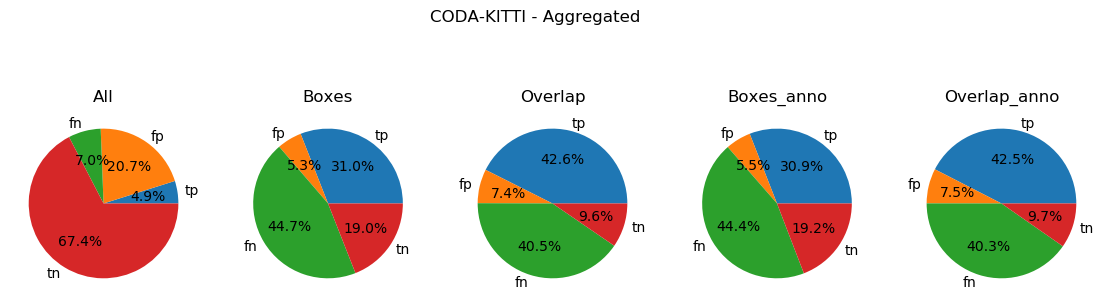

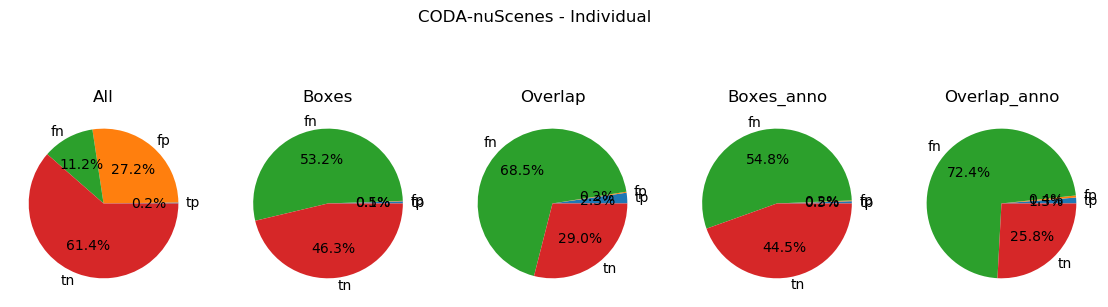

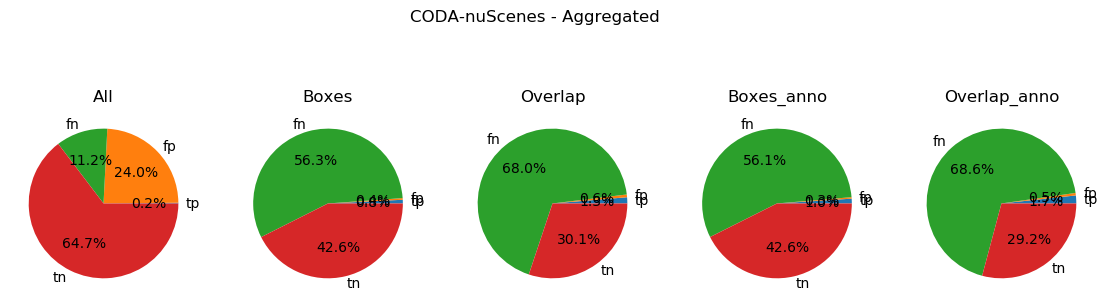

In [95]:
get_IoU_AP_AR_F1_datasets(eval_all)
#print_graphs()
#get_IoU_AP_AR_F1_anomalies(eval_anomalies)



In [88]:
get_IoU_AP_AR_F1_anomalies(eval_anomalies)

sc_pedestrian: Boxes
Count: 17
mean IoU: 28.3
mean AP: 41.5
mean AR: 31.0
mean F1: 35.5
IoU: 53.8
AP: 79.0
AR: 62.7
F1: 70.0

sc_pedestrian: Overlap
Count: 16
mean IoU: 33.9
mean AP: 44.1
mean AR: 37.3
mean F1: 40.4
IoU: 57.7
AP: 79.0
AR: 68.1
F1: 73.2

sc_cyclist: Boxes
Count: 24
mean IoU: 32.5
mean AP: 53.4
mean AR: 38.6
mean F1: 44.8
IoU: 38.0
AP: 76.6
AR: 42.9
F1: 55.0

sc_cyclist: Overlap
Count: 22
mean IoU: 41.6
mean AP: 58.3
mean AR: 49.5
mean F1: 53.5
IoU: 49.0
AP: 76.6
AR: 57.6
F1: 65.8

sc_vehicle: Boxes
Count: 866
mean IoU: 22.8
mean AP: 41.0
mean AR: 27.3
mean F1: 32.8
IoU: 35.2
AP: 82.3
AR: 38.1
F1: 52.1

sc_vehicle: Overlap
Count: 736
mean IoU: 33.0
mean AP: 48.3
mean AR: 41.0
mean F1: 44.4
IoU: 43.3
AP: 82.3
AR: 47.7
F1: 60.4

sc_animal: Boxes
Count: 8
mean IoU: 0.0
mean AP: 0.0
mean AR: 0.0
mean F1: 0
IoU: 0.0
AP: 0
AR: 0.0
F1: 0

sc_animal: Overlap
Count: 5
mean IoU: 0.0
mean AP: 0.0
mean AR: 0.0
mean F1: 0
IoU: 0.0
AP: 0
AR: 0.0
F1: 0

sc_traffic_facility: Boxes
Count

#### Points per scenario as defined by Sartoris

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        if y[i] == 0:
            plt.text(i,y[i]+1.5,int(y[i]), ha = 'center')
            continue
        plt.text(i,y[i]*1.005,int(y[i]), ha = 'center')

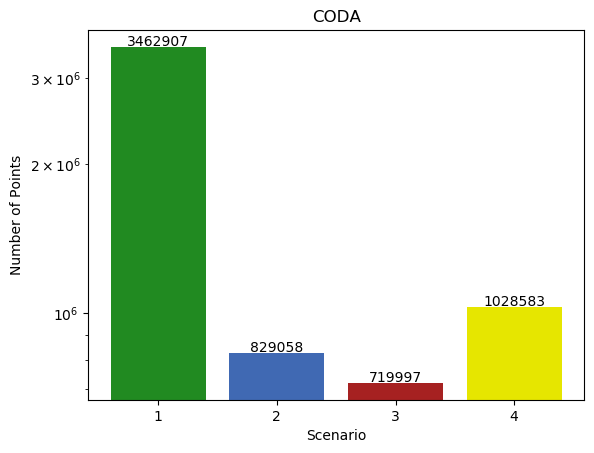

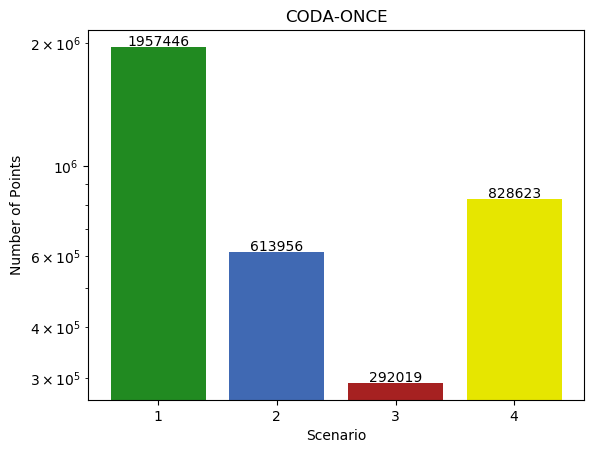

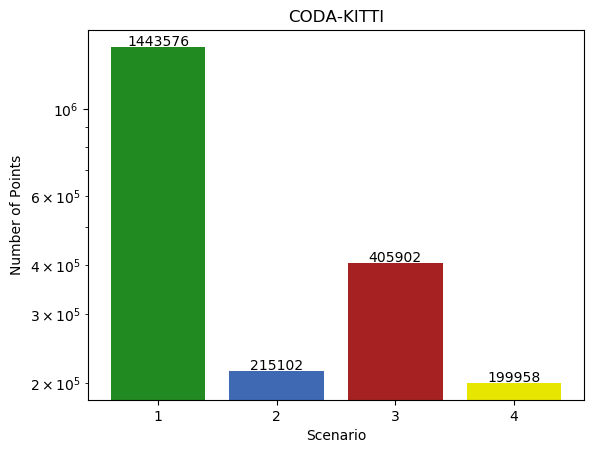

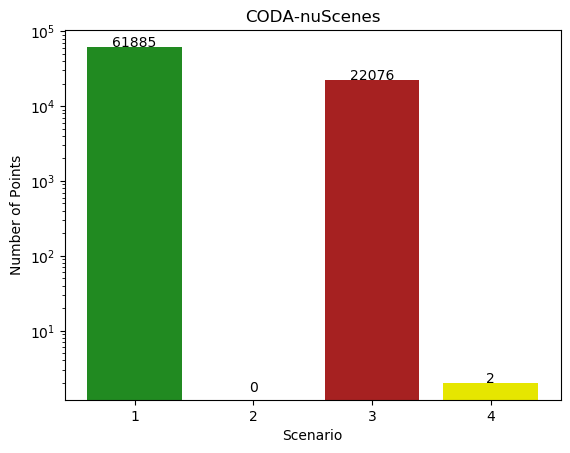

In [ ]:
names = ['CODA', 'CODA-ONCE', 'CODA-KITTI', 'CODA-nuScenes']
scenario_labels = ['1', '2', '3', '4']
for index, s in enumerate(sum_all):
    scenario1 = s[0] + s[4] + s[10]
    scenario2 = s[1] + s[5] + s[11]
    scenario3 = s[2] + s[6] + s[12]
    scenario4 = s[3] + s[7] + s[13] 
    scenarios = [scenario1, scenario2, scenario3, scenario4]
    
    plt.bar(scenario_labels, scenarios, color=[(0.13,0.54,0.13), (0.25,0.41,0.7), (0.65,0.13,0.13), (0.9,0.9,0)])
    addlabels(scenario_labels, scenarios)
    plt.xlabel('Scenario')
    plt.ylabel('Number of Points')
    plt.yscale('log')
    plt.title(f'{names[index]}')
    
    plt.savefig(os.path.join(graphics_root, f'points_per_scenario_{names[index]}.svg'), format='svg', dpi=1200)
    plt.show()
    plt.close()